In [99]:
library(tidyverse)
library(lme4)
library(dplyr)

In [126]:
yuchen_data <- read.csv("../data/interim/Final_Results_from_yuchen_20220718_with_lipid_class_parsed.csv", )
factor_cols <- c("C_cat", "unsat_cat", "molec_class")
yuchen_data[factor_cols] <- lapply(yuchen_data[factor_cols], factor)
yuchen_data$is_id <- as.logical(yuchen_data$is_id)
yuchen_data <- yuchen_data %>% group_by(molec_class) %>% filter(n() >= 20) %>% filter(molec_class != '') %>% filter(C < 100)
yuchen_data

X,RT,m.z,Polarity,Area..Max..,ID,molec_class,Features.Found,X20211113_Ernie_nLipid_60min_r_1950_3.raw..F1.,X20211113_Ernie_nLipid_60min_r_1950_4.raw..F2.,X20211113_Ernie_nLipid_60min_r_1950_5.raw..F3.,X20211113_Ernie_nLipid_60min_15k_1950_1.raw..F4.,X20211113_Ernie_nLipid_60min_15k_1950_2.raw..F5.,X20211113_Ernie_nLipid_60min_15k_1950_3.raw..F6.,mean,is_id,C,unsat,C_cat,unsat_cat
<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<fct>,<fct>
179,13.019,440.2770,+,7.146178e+05,LysoPC 12:0,LysoPC,1,6.565733e+05,5.203275e+05,7.146178e+05,5.372356e+05,6.182419e+05,6.213276e+05,NA,TRUE,12,0,12,0
347,14.236,542.3212,+,1.309590e+08,LysoPC 20:5,LysoPC,3,1.002593e+08,1.047841e+08,1.258945e+08,1.309590e+08,1.239443e+08,1.154463e+08,NA,TRUE,20,5,20,5
360,14.294,500.2769,+,6.318216e+06,LysoPE 20:5,LysoPE,5,6.318216e+06,5.960128e+06,5.440675e+06,4.152717e+06,4.692193e+06,6.080846e+06,NA,TRUE,20,5,20,5
389,14.398,518.3245,+,2.864749e+08,LysoPC 18:3,LysoPC,1,2.596506e+08,1.782375e+08,2.552650e+08,1.727324e+08,2.391523e+08,2.864749e+08,NA,TRUE,18,3,18,3
392,14.414,500.2772,+,1.015092e+07,LysoPE 20:5,LysoPE,6,9.006630e+06,9.280113e+06,9.523754e+06,9.631332e+06,9.351158e+06,1.015092e+07,NA,TRUE,20,5,20,5
393,14.414,568.3483,+,1.651871e+06,LysoPC 22:6,LysoPC,5,1.240785e+06,1.062958e+06,1.367517e+06,1.651871e+06,1.343467e+06,1.409603e+06,NA,TRUE,22,6,22,6
395,14.423,468.3083,+,2.537499e+08,LysoPC 14:0,LysoPC,6,2.516282e+08,1.844558e+08,2.537499e+08,2.300709e+08,1.910217e+08,2.247154e+08,NA,TRUE,14,0,14,0
425,14.548,576.4105,+,5.369897e+07,LysoPC 22:2,LysoPC,9,3.232662e+07,4.180962e+07,5.369897e+07,3.390231e+07,4.416464e+07,3.938483e+07,NA,TRUE,22,2,22,2
433,14.587,468.3083,+,2.853282e+08,LysoPC 14:0,LysoPC,6,2.223418e+08,2.377514e+08,2.102130e+08,2.220811e+08,2.343992e+08,2.853282e+08,NA,TRUE,14,0,14,0


In [85]:
data <- read.csv("../data/interim/Unfiltered_Results_with_lipid_class_parsed.csv", )
# only_id <- data[!is.na(data['molec_class']), ]
factor_cols <- c("C_cat", "unsat_cat", "molec_class")
data[factor_cols] <- lapply(data[factor_cols], factor)
data$is_id <- as.logical(data$is_id)
data

X,RT,m.z,Polarity,Area..Max..,ID,molec_class,Features.Found,Filter.Status,X20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank.raw..F1.,...,X1102_10_RBG,X20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw..F65.,X20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw..F66.,X20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw..F67.,mean,is_id,C,unsat,C_cat,unsat_cat
<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<int>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<fct>,<fct>
0,0.528,664.0768,+,7218670,,,2,Dimer,3616.601,...,3586652,4371.310,3837.969,3872.152,3856685,FALSE,NA,NA,NA,NA
1,0.529,662.0858,+,20568650,,,4,Dimer,4138.792,...,12107026,5002.471,4392.123,4457.358,12440373,FALSE,NA,NA,NA,NA
2,0.530,991.1186,+,9722884,,,6,Adduct of existing peak,5222.040,...,6104699,6484.219,5541.676,5623.985,5649135,FALSE,NA,NA,NA,NA
3,0.531,661.0826,+,77787029,,,44,Dimer,4970.354,...,41167548,6171.700,5274.585,5352.927,45440719,FALSE,NA,NA,NA,NA
4,0.532,659.0687,-,66917575,,,47,Dimer,28520.354,...,42051623,9011.421,6850.520,6319.495,36749488,FALSE,NA,NA,NA,NA
5,0.532,971.1450,+,12652197,,,16,Adduct of existing peak,4398.505,...,7197139,5316.382,4667.734,4709.306,7013779,FALSE,NA,NA,NA,NA
6,0.533,660.0706,-,16706511,,,2,Dimer,18544.474,...,9717856,5313.028,4312.452,4109.055,9806388,FALSE,NA,NA,NA,NA
7,0.533,355.0112,+,4341629,,,2,Adduct of existing peak,7771.930,...,2114588,9650.422,8686.209,8370.142,2000740,FALSE,NA,NA,NA,NA
8,0.535,331.0448,+,133289615,,,47,Adduct of existing peak,5557.230,...,80076660,6900.425,5897.383,5984.975,83986977,FALSE,NA,NA,NA,NA


In [104]:
tgpc <- data[(data['molec_class'] == 'PC') | (data['molec_class'] == 'TG'),]
tg <- data[data['molec_class'] == 'TG',]
only_id <- data[data['molec_class'] != '', ]
only_high_id <- data %>% group_by(molec_class) %>% filter(n() >= 10) %>% filter(molec_class != '')
only_high_id



X,RT,m.z,Polarity,Area..Max..,ID,molec_class,Features.Found,Filter.Status,X20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank.raw..F1.,...,X1102_10_RBG,X20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw..F65.,X20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw..F66.,X20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw..F67.,mean,is_id,C,unsat,C_cat,unsat_cat
<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<int>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<fct>,<fct>
282,1.036,542.3245,+,158512912,LysoPC 20:5,LysoPC,22,,5686.098,...,61850777.8,6400.923,5789.837,5478.643,77821640.4,TRUE,20,5,20,5
287,1.086,554.3472,-,95331499,LysoPC 16:0,LysoPC,25,Redundant Identification,7065.198,...,31828224.1,7957.852,6578.542,6350.485,26983805.2,TRUE,16,0,16,0
292,1.095,496.3399,+,612277753,LysoPC 16:0,LysoPC,70,,106710.241,...,265432004.0,7214.935,6799.297,6455.632,280996140.9,TRUE,16,0,16,0
296,1.114,520.3400,+,3474620752,LysoPC 18:2,LysoPC,3,,11349.610,...,198798355.0,11678.997,10500.877,10137.464,334613798.8,TRUE,18,2,18,2
301,1.137,522.3524,+,17456423,LysoPC 18:1,LysoPC,28,,12785.742,...,7312188.9,13207.206,11829.613,11420.216,7328603.0,TRUE,18,1,18,1
311,1.289,568.3397,+,187932123,LysoPC 22:6,LysoPC,42,,8737.905,...,17754136.4,9536.337,8742.662,8548.396,43702481.3,TRUE,22,6,22,6
320,1.324,482.3239,+,9159678,LysoPC 15:0,LysoPC,8,,8961.525,...,2061504.0,9786.411,8966.404,8855.973,3110636.3,TRUE,15,0,15,0
322,1.332,544.3398,+,185029690,LysoPC 20:4,LysoPC,84,,10487.780,...,25326766.9,11453.153,10493.490,10886.101,48400348.7,TRUE,20,4,20,4
323,1.333,602.3473,-,17132803,LysoPC 20:4,LysoPC,30,Redundant Identification,10157.936,...,1970805.2,13484.264,10837.651,10333.616,4115545.2,TRUE,20,4,20,4


In [53]:
mlm <- lmer(RT ~ C + (1|unsat_cat), data = tg)
summary(mlm)

Linear mixed model fit by REML ['lmerMod']
Formula: RT ~ C + (1 | unsat_cat)
   Data: tg

REML criterion at convergence: 85.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1709 -0.5652 -0.0132  0.4063  2.3374 

Random effects:
 Groups    Name        Variance Std.Dev.
 unsat_cat (Intercept) 11.08614 3.3296  
 Residual               0.04461 0.2112  
Number of obs: 175, groups:  unsat_cat, 17

Fixed effects:
             Estimate Std. Error t value
(Intercept) -5.440331   0.878733  -6.191
C            0.372470   0.006067  61.393

Correlation of Fixed Effects:
  (Intr)
C -0.393

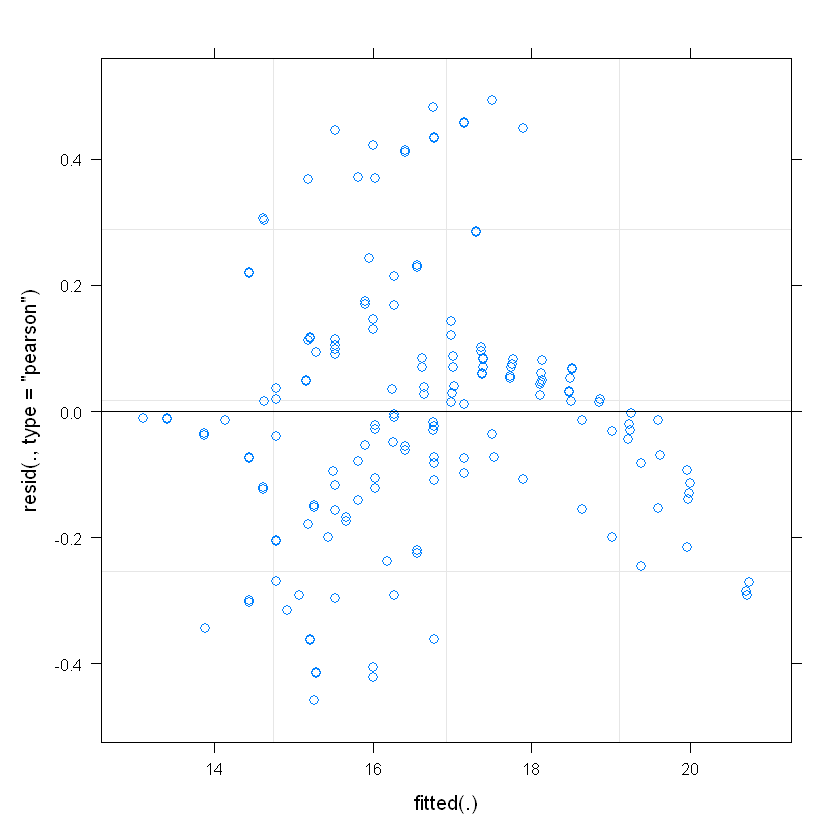

In [50]:
plot(mlm)

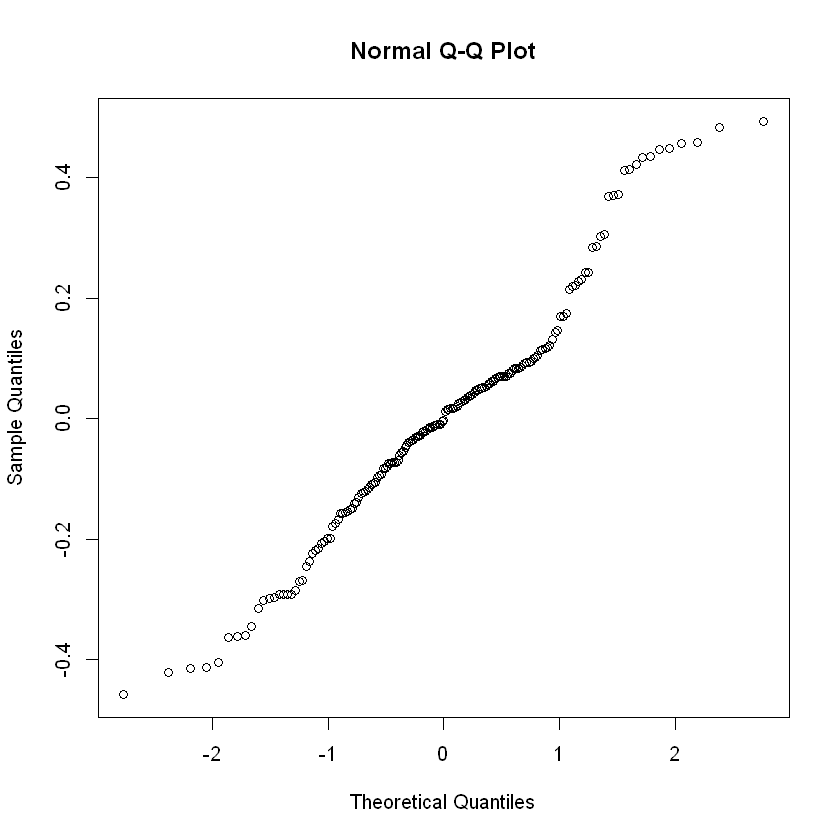

In [51]:
qqnorm(resid(mlm))

# Fit all classes in a nested mixed model 

In [129]:
?theme_classic

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.105612 (tol = 0.002, component 1)"


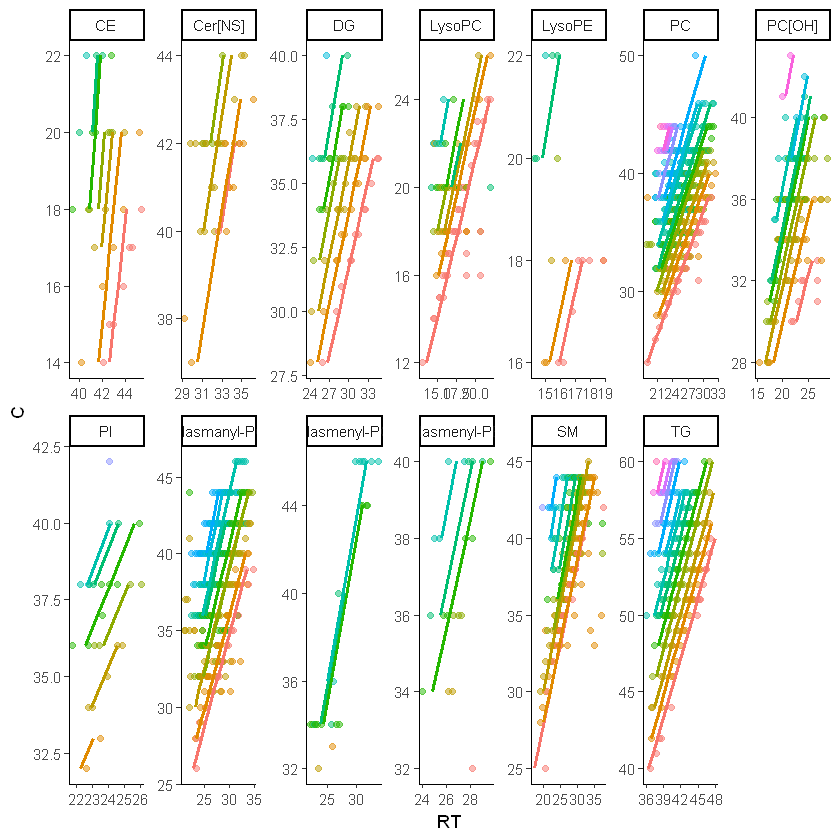

In [131]:
df <- yuchen_data

mlm <- lmer(RT ~ C + (1 + C|molec_class/unsat_cat), data = df)
# summary(mlm)

(mm_plot <- ggplot(df, aes(y = C, x = RT, colour = unsat_cat)) +
      facet_wrap(~molec_class, nrow=2, scales="free") +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(df, pred = predict(mlm)), 
                aes(x = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(0.5, "lines"))  # adding space between panels
)

ggsave('../reports/figures/test.pdf', mm_plot, width=10, height=5, units='in', dpi=300)

In [119]:
?ggsave


In [114]:
?facet_wrap